==============================================================================================
## Practicum 4: Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

In this laboratory we will treat the following main topics:

1) Template matching
    - Normalized Cross-correlation
    - Application to object (eye) detection 

2) Image Descriptors: "Sliding window" and HOG image descriptor
   - Application to object (car) detection

3) Image matching (recognition by correspondance) based on feature extraction (ORB)
    - Application to object (logo) detection
    
In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

All code should be commented in English. Answers of the questions and comments on the exercises should be given in English too.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

## 4.1 Template matching

4.1.1 Given the image 'einstein.png' and the template 'eye.png', detect the location of the template in the image comparing the use of:
- euclidean distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Hint: you can take as an example, the template matching on the [coin exercise](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_template.html#sphx-glr-auto-examples-features-detection-plot-template-py) in skimage.
Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

# _Using Normalized Cross-Correlation_:

In [2]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
from skimage.color import rgb2gray
%matplotlib inline
from skimage.feature import match_template

eye=io.imread('./images/eye.png')
einstein=io.imread('./images/einstein.png')

einstein_gray = rgb2gray(einstein)
eye_gray = rgb2gray(eye)

match = match_template(einstein_gray,eye_gray)

f, axarr = plt.subplots(1,3)
f.set_size_inches(10,10)

axarr[0].imshow(einstein)
axarr[0].set_title('Original')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(eye)
axarr[1].set_title('Template')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)

axarr[2].imshow(match,cmap = "gray")
axarr[2].set_title('Template Matching Normalized Cross Correlation')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)

plt.show()

* GENERAL FUNCTION:

In [3]:
def match_temp_cross(image, temp):
    image_gray = rgb2gray(image)
    temp_gray = rgb2gray(temp)
    match = match_template(image_gray, temp_gray)
    return match

# _Euclidean Distance_:

In [4]:
from numpy import linalg as la

res = np.zeros(einstein_gray.shape, dtype='float64')
temp_norm = la.norm(eye_gray)/max(eye_gray.shape)
for i in range(res.shape[0]-eye_gray.shape[0]):
    for j in range(res.shape[1]-eye_gray.shape[1]):
        dist = la.norm(eye_gray - einstein_gray[i:i+eye_gray.shape[0],j:j+eye_gray.shape[1]])/max(eye_gray.shape)
        res[i][j] = temp_norm - dist
res = res[:(einstein_gray.shape[0]-eye_gray.shape[0]),:(einstein_gray.shape[1]-eye_gray.shape[1])]


f, axarr = plt.subplots(1,3)
f.set_size_inches(10,10)

axarr[0].imshow(einstein)
axarr[0].set_title('Original')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(eye)
axarr[1].set_title('Template')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)

axarr[2].imshow(res,cmap = "gray")
axarr[2].set_title('Template Matching with Euclidean Distance')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)

plt.show()

* GENERAL FUNCTION:

In [5]:
def match_temp_eucl(image, temp):
    image_gray = rgb2gray(image)
    temp_gray = rgb2gray(temp)
    res = np.zeros(image_gray.shape, dtype='float64')
    temp_norm = la.norm(temp_gray)/max(temp_gray.shape)
    for i in range(res.shape[0]-temp_gray.shape[0]):
        for j in range(res.shape[1]-temp_gray.shape[1]):
            dist = la.norm(temp_gray - image_gray[i:i+temp_gray.shape[0],j:j+temp_gray.shape[1]])/max(temp_gray.shape)
            res[i][j] = temp_norm - dist
    return res[:(image_gray.shape[0]-temp_gray.shape[0]),:(image_gray.shape[1]-temp_gray.shape[1])]

def match_temp_eucl_with_minDist(image, temp):
    minDist = float('Inf')
    
    image_gray = rgb2gray(image)
    temp_gray = rgb2gray(temp)
    res = np.zeros(image_gray.shape, dtype='float64')
    temp_norm = la.norm(temp_gray)/max(temp_gray.shape)
    for i in range(res.shape[0]-temp_gray.shape[0]):
        for j in range(res.shape[1]-temp_gray.shape[1]):
            dist = la.norm(temp_gray - image_gray[i:i+temp_gray.shape[0],j:j+temp_gray.shape[1]])/max(temp_gray.shape)
            res[i][j] = temp_norm - dist
            if dist < minDist:
                minDist = dist
    return minDist

## _Function that shows certain images with an specified title:_

In [6]:
def showcase(images, title):
    f, axarr = plt.subplots(1,len(images))
    f.set_size_inches(20,20)
    for i in range(len(images)):
        axarr[i].imshow(images[i], cmap='gray')
        axarr[i].set_title(title[i])
        axarr[i].xaxis.set_visible(False)
        axarr[i].yaxis.set_visible(False)
    plt.show()

## 4.1.2

* How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? To this purpose, read the images "einstein_br.png" and "einstein_mask.png":

We can see that both methods are affected (are sensible) by the contrast of the image. Specifically, the lower the contrast is, the bigger is the diference (distance). If the diference is big, we are not "close" or we are far away from a posible template pixel. We can see it below:

* In one hand, Euclidean Distance Method doesn't get the location of the template on Einstein BR image: we can't see the typical white dots on his eyes. In conclusion, Euclidean Distance Method doesn't work if we change in a bigger way the contrast of an image.

* On the other hand, Normalized Cross-correlation Method still gets the location of the template on Einstein BR image, but we can see that it decreases in accurany if we compare it with the result of original Einstein and Eye images.

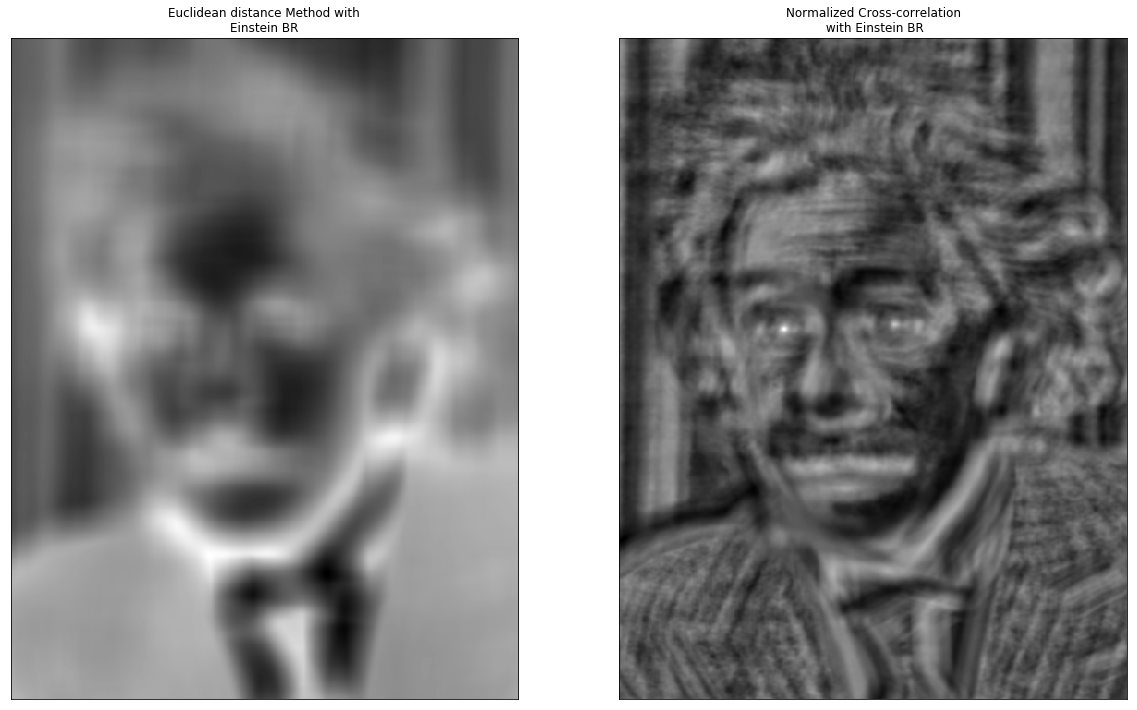

In [7]:
einstein_br = io.imread('./images/einstein_br.png')
eye_br = io.imread('./images/eye_br.png')

res_eu = match_temp_eucl(einstein_br,eye)
res_cross = match_temp_cross(einstein_br,eye)
showcase([res_eu, res_cross], ["Euclidean distance Method with\nEinstein BR", "Normalized Cross-correlation\n with Einstein BR"])

* Visualize the normalized cross-correlation image between the template and the image as well as this very same image in a binarized form in order to show where is the minimal distance between the template and the image.:

In [27]:
from skimage.filters import threshold_yen
from skimage import img_as_float


einstein_mask = io.imread('./images/einstein_mask.png')
einstein_br_float = img_as_float(einstein_br)

einstein_mask_float = img_as_float(einstein_mask)

res_cross = match_temp_cross(einstein,eye)
thresh = threshold_yen(res_cross)
binary = res_cross > thresh

einstein_br = io.imread('./images/einstein_br.png')
einstein_br_float = img_as_float(einstein_br)
einstein_mask = io.imread('./images/einstein_mask.png')
einstein_mask_float = img_as_float(einstein_mask)

res_cross1 = match_temp_cross(einstein_br_float, eye)
thresh1 = threshold_yen(res_cross1)
binary1 = res_cross1 > thresh1

res_cross2 = match_temp_cross(einstein_mask_float, eye)
thresh2 = threshold_yen(res_cross2)
binary2 = res_cross2 > thresh2+0.45 #This is the exact extra amount of treshold that we have to increase to get a similar
#binary image like the others

f, axarr = plt.subplots(1,3)
f.set_size_inches(10,10)

axarr[0].imshow(binary,cmap="gray")
axarr[0].set_title('Tresholded (binary) image with\nOriginal Einstein\nand Eye images')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)

axarr[1].imshow(binary1,cmap="gray")
axarr[1].set_title('Tresholded (binary) image with\nContrasted Einstein\nand Eye images')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)

axarr[2].imshow(binary2,cmap = "gray")
axarr[2].set_title('Tresholded (binary) image with\nMasked-Einstein image\nand Original Eye image')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)

plt.show()

* What are the minimal distance pixels in the correlation images?

In [28]:
#We can see that the minimal distance pixels are those pixels in white (TRUE)
for i in range(binary.shape[0]):
    for j in range(binary.shape[1]):
        if binary[i][j] == True:
            print("Here it is one Min Pixel at row ",i," and column ",j)

Here it is one Min Pixel at row  309  and column  298
Here it is one Min Pixel at row  309  and column  299
Here it is one Min Pixel at row  310  and column  296
Here it is one Min Pixel at row  310  and column  297
Here it is one Min Pixel at row  310  and column  298
Here it is one Min Pixel at row  310  and column  299
Here it is one Min Pixel at row  310  and column  300
Here it is one Min Pixel at row  311  and column  296
Here it is one Min Pixel at row  311  and column  297
Here it is one Min Pixel at row  311  and column  298
Here it is one Min Pixel at row  311  and column  299
Here it is one Min Pixel at row  311  and column  300
Here it is one Min Pixel at row  312  and column  179
Here it is one Min Pixel at row  312  and column  297
Here it is one Min Pixel at row  312  and column  298
Here it is one Min Pixel at row  312  and column  299
Here it is one Min Pixel at row  313  and column  176
Here it is one Min Pixel at row  313  and column  177
Here it is one Min Pixel at 

* What are the distances between the template and the image around the eyes of the image?

We know that the smaller the diference is, the closer is that pixel to be part of the template. So around the eyes, those distances are getting smaller, we are getting closer to a posible template

4.1.3 How does the result of the template matching changes if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the 'eye_br.png' template.

* We can see that both methods still find out where the template might be (because we can see two little white dots on his eyes) but we clearly see a decrease in accuracy of the Euclidean Distance Method. On the other hand, Normalized Cross-correlation method doesn't decrease so much his accuracy, but if we compare it with the result of Einstein and Eye original, we can see that it gets worse.

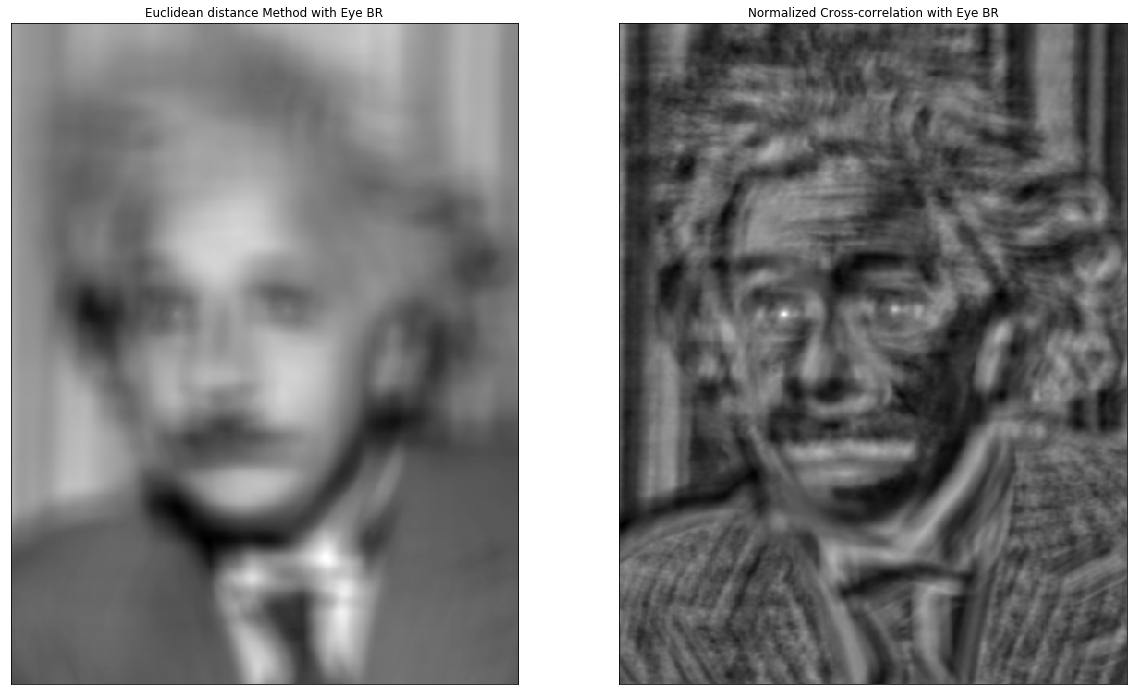

In [29]:
res_eu = match_temp_eucl(einstein,eye_br)
res_cross = match_temp_cross(einstein,eye_br)
showcase([res_eu, res_cross], ["Euclidean distance Method with Eye BR", "Normalized Cross-correlation with Eye BR"])

4.1.4 Check how the result changes if the template is rotated. Visualize the template and its rotation by 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.
Help: use the function rotate() in skimage.transform

* We can perfectly see that rotation affects both methods. Specifically, the more rotated is the image, worst aproximation we get. 20º degree rotation is the perfect example: we barely can see the eye-white-dots in both methods. 

In [30]:
from skimage.transform import rotate
eye_rotate_10 = rotate(eye,10)
eye_rotate_15 = rotate(eye,15)
eye_rotate_20 = rotate(eye,20)

res_eu_10 = match_temp_eucl(einstein,eye_rotate_10)
res_cross_10 = match_temp_cross(einstein,eye_rotate_10)
res_eu_15 = match_temp_eucl(einstein,eye_rotate_15)
res_cross_15 = match_temp_cross(einstein,eye_rotate_15)
res_eu_20 = match_temp_eucl(einstein,eye_rotate_20)
res_cross_20 = match_temp_cross(einstein,eye_rotate_20)
showcase([res_eu_10, res_cross_10,res_eu_15, res_cross_15,res_eu_20, res_cross_20], ["Euclidean distance Method with\n10º Rotation", "Normalized Cross-correlation\n with 10º Rotation","Euclidean distance Method with\n15º Rotation","Normalized Cross-correlation\n with 15º Rotation","Euclidean distance Method with\n20º Rotation","Normalized Cross-correlation\n with 20º Rotation"])

Comment what is the template matching process, what advantages and disadvantages it has, how sensible is to image deformation in photometric and spatial dimensions, what parameters it has and which measure for image comparisons works better.

* The template matching process is a set of actions that have as objective the search and aproximation of a template in a image. We've saw here two methods:

* The Euclidean Distance: this methods iterates the image in order to compare on every iteration the template with the section of the image we are itarting. This comparision is the Euclidean Distance between the pixels of the template and the image. The smaller the distance is, the closer are both pixels of being part of the same image. 

* The Cross-Correlation Method: this method shares the principe of the Euclidean Distance one, but it normalizes (divides) by the square sum of the pixel that we are comparing. In other words, the correlation isn't calculated on the whole template. This correlation, instead, is obtained as the weighted sum of the correlation functions of the basis function (The Euclidean + Normalitzation one)

# 4.2 Histogram of Oriented Gradients


The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image 'car_template.png' and the folder 'cars', apply the HOG descriptor in order to detect where there is a car in the images in the folder 'car'. To this purpose, apply the "sliding window" technique. The algorithm can be:

a) Read the car template ('car_template.png') and obtain its HOG descriptor. Visualize it. [Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py) 

b) Read images from the folder "car", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the car template. 

c) Visualize the location in the image that is the most similar to the car template. What distance will you use to compare both HOG descriptors of the car template and the image region? Compare if there is any difference in their results. 

d) Compute in how many images the cars were detected correctly and discuss the algorithm failures. What do you think can be the reasons for the failure?

Hint: the HOG detector function is in the skimage.feature library. 

If you want to accelerate algorithm execution, you can apply the sliding window with a step of X pixels (e.g. X=5).

Discuss what is the HOG descriptor, what are the parameters of the algorithm, which are the optimal values for the car detection testing several values of the parameters up to your criterion. Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

In [31]:
#This is the  generarl function that returns the HOG of an image. 
from skimage.feature import hog
def hog_func(image):
    image = img_as_float(image)
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(2, 5), cells_per_block=(2,2), visualise=True)
    return hog_image

C:\Users\blair\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


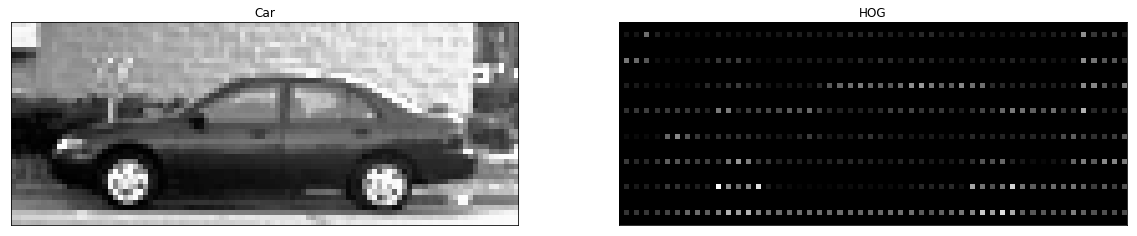

In [32]:
#Here we read the car template and store his HOG on a variable. We also show the result
car = io.imread('./images/car_template.png')
querry = hog_func(car)
showcase([car, querry], ["Car", "HOG"])

In [ ]:
#Here it is our main algorithm. We use in first place a Image Collection to get every test-car image. 
#Then, for every test image we compute its HOG. This HOG is compared with the match_template function with our template hog.
#Result is a hog-like image that has the result of the comparision. With unravel_index we 
#convert this array of flat indices into a tuple of coordinate arrays, and now we can locate the computed-rectangle that shows
#us where the match (the car) is in the test-image. 

#We can't show all 170 images, so we append every result to a list, with his coordinates. 
#THIS ALGORITHM TAKES A LITTLE-LONG TIME

ic = io.ImageCollection('images/TestImages/*.pgm')
llista = []
coords = []
for i in range(len(ic)): #For each frame
    im_current = ic[i]
    im_hog = hog_func(im_current)
    
    result = match_template(im_hog,querry)
    
    ij = np.unravel_index(np.argmax(result), result.shape)
    x, y = ij[::-1]
    wcar,hcar = im_current.shape
    llista.append((im_current,x,y))

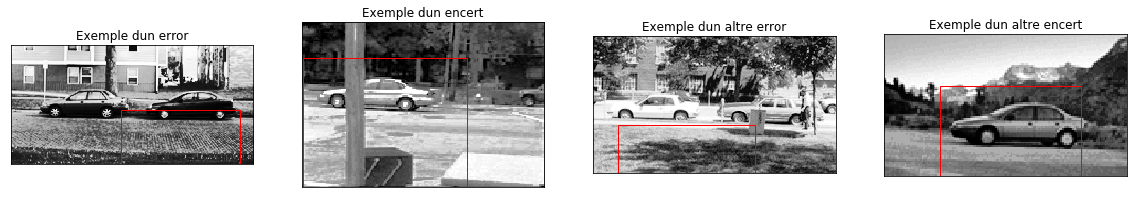

In [35]:
#We cant show all 170 images, so we will show some good examples and some bad examples:

bad1 = llista[3]

good1 = llista[100]
bad2 = llista[4]
good2 = llista[5]

f, axarr = plt.subplots(1,4)
f.set_size_inches(20,20)

axarr[0].imshow(bad1[0],cmap = "gray")
axarr[0].set_title('Exemple dun error')
axarr[0].xaxis.set_visible(False)
axarr[0].yaxis.set_visible(False)
wcar,hcar = bad1[0].shape
rect = plt.Rectangle((bad1[1], bad1[2]), wcar, hcar, edgecolor='r', facecolor='none')
axarr[0].add_patch(rect)

axarr[1].imshow(good1[0],cmap = "gray")
axarr[1].set_title('Exemple dun encert')
axarr[1].xaxis.set_visible(False)
axarr[1].yaxis.set_visible(False)
wcar,hcar = good1[0].shape
rect = plt.Rectangle((good1[1], good1[2]), wcar, hcar, edgecolor='r', facecolor='none')
axarr[1].add_patch(rect)

axarr[2].imshow(bad2[0],cmap = "gray")
axarr[2].set_title('Exemple dun altre error')
axarr[2].xaxis.set_visible(False)
axarr[2].yaxis.set_visible(False)
wcar,hcar = bad2[0].shape
rect = plt.Rectangle((bad2[1], bad2[2]), wcar, hcar, edgecolor='r', facecolor='none')
axarr[2].add_patch(rect)


axarr[3].imshow(good2[0],cmap = "gray")
axarr[3].set_title('Exemple dun altre encert')
axarr[3].xaxis.set_visible(False)
axarr[3].yaxis.set_visible(False)
wcar,hcar = good2[0].shape
rect =plt.Rectangle((good2[1], good2[2]), wcar, hcar, edgecolor='r', facecolor='none')
axarr[3].add_patch(rect)

plt.show()

d) Compute in how many images the cars were detected correctly and discuss the algorithm failures. What do you think can be the reasons for the failure?

* We can see that both-error images are images with 2 or more cars in it. This is one clear failure: this algorithm doesn't work with 2 or more cars (close on with each other) and 1 (and only) rectangle. Other errors might occur because this algorithm uses the match_template function, that just compares two HOG's and finds out a similarity. This similarity is "subjective" so has a margin of error. 

Discuss what is the HOG descriptor

* The HOG Descriptor is an HOG-image like that has the information of the gradient orientation of an image. This info allows us to find objects (defined on a template) on an image. 
What are the parameters of the algorithm

* Our algorithm doesn't need any parametres. 

Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

* There are sevevral adventages. In a general aspect, we can see that HOG-based object detector is a more reliable method in comparision with the Template-based object detector. Its also quicker. This is because the template can be described by the distribution of intensity gradients or edge directions, wich is compared with the distribution of intensity gradients or edge directions of the test-image. This comparision is done in a better way compared with the template-based methods, like Euclidean or Cross Correlation, that only use the pixels info of both images. This two last methods are also vulnerable to the contrast of the image, and HOG-based Method isn't affected. Specially, it operates on local cells, so it's invariant to geometric and photometric transformations. Consequently, its also ideal for pedestrian detection. In a more programer-vision, HOG-based methods offer us the exact coordenates of the object detected, and theres only one detection. In template-based methods, we have "some white dots" that represents the minimal distance. This minimal distance can be found on another regions of the image, some false-detections that can lead us to an error. 



# 4.3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

In theory classes, we saw two feature extraction methods: SIFT and ORB. Let us focus on ORB.

**4.3.1** Check if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

a) Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks6.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. Define the algorithm in terms of functions in order to be able to apply it on different images. Comment the code in detail.

Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.

In [42]:
''' Visualization and ORB functions definition '''
from skimage.feature import (match_descriptors, ORB, plot_matches)
from skimage.color import rgb2gray

#Function that returns the matches (similar points) of both images, as well as the keypoints
def matchsORB(image, template):
    #Gray images computed
    img_gray = rgb2gray(image)
    tem_gray = rgb2gray(template)
    
    des_extr = ORB(n_keypoints=200) #ORB function returns us the extracted descriptors
    
    des_extr.detect_and_extract(img_gray) #Obtain the final descriptor so we can get the keypoints
    
    #Get the keypoints
    keypoints1 = des_extr.keypoints
    descriptors1 = des_extr.descriptors
    
    des_extr.detect_and_extract(tem_gray)
    keypoints2 = des_extr.keypoints
    descriptors2 = des_extr.descriptors
    
    #Return them
    return match_descriptors(descriptors1, descriptors2, cross_check=True), keypoints1, keypoints2

#Function that we defined to show ORB-result images
def showcaseORB(images):
    fig, ax = plt.subplots(nrows=len(images), ncols=1)
    fig.set_size_inches(20,20)
    plt.gray()
    if len(images)>1:
        for i in range(len(images)):
            plot_matches_aux(ax[i], images[i][0], images[i][1], images[i][2], images[i][3], images[i][4])
            ax[i].set_title(images[i][6]+' vs '+images[i][7])
            ax[i].axis('off')
            print("N of matches between:", images[i][6], '&', images[i][7],"(logo)","->", images[i][5])
    else:
        i = 0
        plot_matches_aux(ax, images[i][0], images[i][1], images[i][2], images[i][3], images[i][4])
        ax.set_title(images[i][6]+' vs '+images[i][7]+"(logo)")
        ax.axis('off')
    plt.show()

a) Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks6.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. Define the algorithm in terms of functions in order to be able to apply it on different images. Comment the code in detail.

In [43]:
starbucks_logo = io.imread('./images/starbucks.jpg')
starbucks6 =  io.imread('./images/starbucks6.jpg')
matches12, keypoints1, keypoints2 = matchsORB(starbucks6, starbucks_logo)

images = [(starbucks6, starbucks_logo, keypoints1, keypoints2, matches12, len(matches12), 'starbucks6.jpg', 'starbucks.jpg')]
showcaseORB(images)

b) Repeate the experiment comparing the "starbucks.jpg" image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when the algorithm works best. 

In [44]:
from operator import itemgetter
starbucks_logo = io.imread('./images/starbucks.jpg')
starbucks2 =  io.imread('./images/starbucks2.png')
starbucks2 = starbucks2[:,:,:3]
starbucks4 =  io.imread('./images/starbucks4.jpg')
starbucks5 =  io.imread('./images/starbucks5.png')
starbucks6 =  io.imread('./images/starbucks6.jpg')
starbucksCup =  io.imread('./images/starbucksCup.jpg')

images = []

matches12, keypoints1, keypoints2 = matchsORB(starbucks2, starbucks_logo)
images.append((starbucks2,starbucks_logo,keypoints1,keypoints2,matches12,len(matches12), 'starbucks2.png', 'starbucks.jpg'))

matches13, keypoints1, keypoints3 = matchsORB(starbucks4, starbucks_logo)
images.append((starbucks4,starbucks_logo,keypoints1,keypoints3,matches13,len(matches13), 'starbucks4.jpg', 'starbucks.jpg'))

matches14, keypoints1, keypoints4 = matchsORB(starbucks5, starbucks_logo)
images.append((starbucks5,starbucks_logo,keypoints1,keypoints4,matches14,len(matches14), 'starbucks5.png', 'starbucks.jpg'))

matches15, keypoints1, keypoints5 = matchsORB(starbucks6, starbucks_logo)
images.append((starbucks6,starbucks_logo,keypoints1,keypoints5,matches15,len(matches15), 'starbucks6.jpg', 'starbucks.jpg'))

matches16, keypoints1, keypoints6 = matchsORB(starbucksCup, starbucks_logo)
images.append((starbucksCup,starbucks_logo,keypoints1,keypoints6,matches16,len(matches16), 'starbucksCup.jpg', 'starbucks.jpg'))

sortedimages = list(reversed(sorted(images,key=itemgetter(5))))
showcaseORB(sortedimages)

N of matches between: starbucks4.jpg & starbucks.jpg (logo) -> 84
N of matches between: starbucks2.png & starbucks.jpg (logo) -> 76
N of matches between: starbucks5.png & starbucks.jpg (logo) -> 72
N of matches between: starbucksCup.jpg & starbucks.jpg (logo) -> 69
N of matches between: starbucks6.jpg & starbucks.jpg (logo) -> 61


 * The algorithm works best with starbucks4.jpg & starbucks.jpg logos with 84 matches

c) Repeate the experiment in (b): 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

Help: To do so, you can use the function given below as example:

import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)

or

tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)

N of matches between: starbucks4.jpg & starbucks.jpg (logo) -> 79
N of matches between: starbucksCup.jpg & starbucks.jpg (logo) -> 73
N of matches between: starbucks6.jpg & starbucks.jpg (logo) -> 69
N of matches between: starbucks5.png & starbucks.jpg (logo) -> 69
N of matches between: starbucks2.png & starbucks.jpg (logo) -> 59


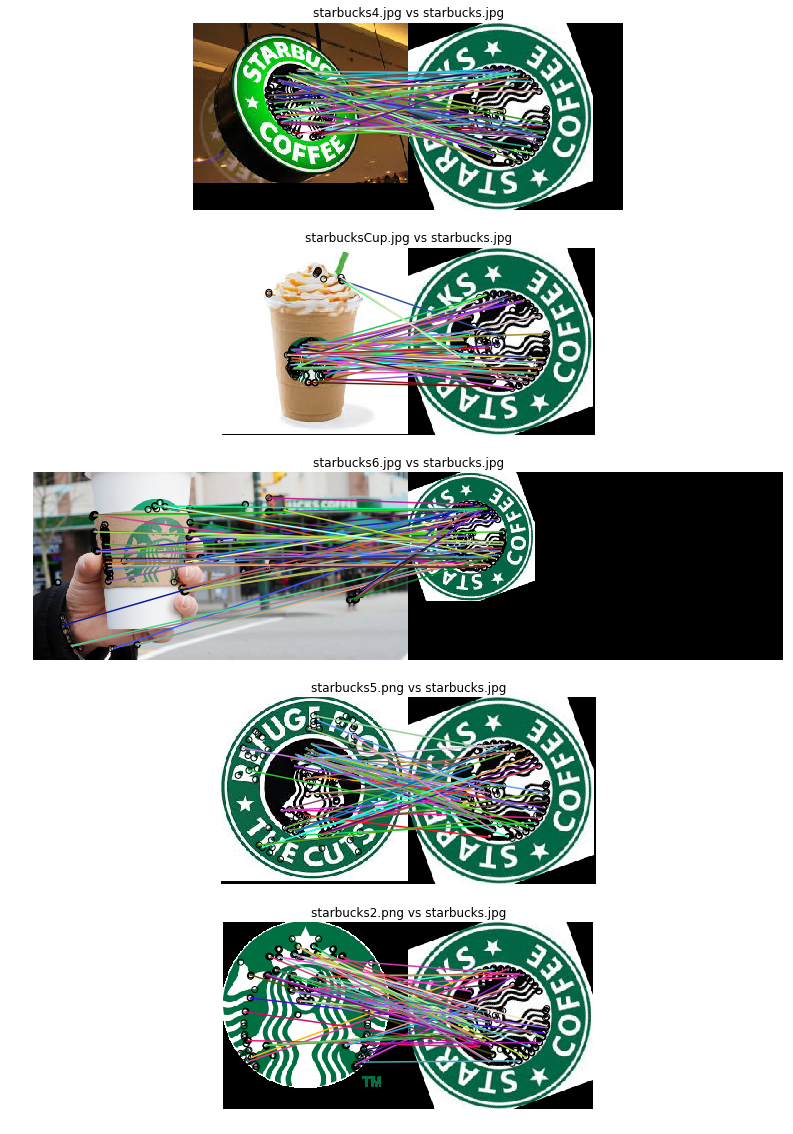

In [45]:
from skimage.transform import rotate
from operator import itemgetter

starbucks_logo = io.imread('./images/starbucks.jpg')
starbucks_logo = rotate(starbucks_logo,110)
starbucks2 =  io.imread('./images/starbucks2.png')
starbucks2 = starbucks2[:,:,:3]
starbucks4 =  io.imread('./images/starbucks4.jpg')
starbucks5 =  io.imread('./images/starbucks5.png')
starbucks6 =  io.imread('./images/starbucks6.jpg')
starbucksCup =  io.imread('./images/starbucksCup.jpg')

images = []

matches12, keypoints1, keypoints2 = matchsORB(starbucks2, starbucks_logo)
images.append((starbucks2,starbucks_logo,keypoints1,keypoints2,matches12,len(matches12), 'starbucks2.png', 'starbucks.jpg'))

matches13, keypoints1, keypoints3 = matchsORB(starbucks4, starbucks_logo)
images.append((starbucks4,starbucks_logo,keypoints1,keypoints3,matches13,len(matches13), 'starbucks4.jpg', 'starbucks.jpg'))

matches14, keypoints1, keypoints4 = matchsORB(starbucks5, starbucks_logo)
images.append((starbucks5,starbucks_logo,keypoints1,keypoints4,matches14,len(matches14), 'starbucks5.png', 'starbucks.jpg'))

matches15, keypoints1, keypoints5 = matchsORB(starbucks6, starbucks_logo)
images.append((starbucks6,starbucks_logo,keypoints1,keypoints5,matches15,len(matches15), 'starbucks6.jpg', 'starbucks.jpg'))

matches16, keypoints1, keypoints6 = matchsORB(starbucksCup, starbucks_logo)
images.append((starbucksCup,starbucks_logo,keypoints1,keypoints6,matches16,len(matches16), 'starbucksCup.jpg', 'starbucks.jpg'))

sortedimages = list(reversed(sorted(images,key=itemgetter(5))))
showcaseORB(sortedimages)

N of matches between: starbucks4.jpg & starbucks.jpg (logo) -> 86
N of matches between: starbucks5.png & starbucks.jpg (logo) -> 77
N of matches between: starbucksCup.jpg & starbucks.jpg (logo) -> 66
N of matches between: starbucks6.jpg & starbucks.jpg (logo) -> 59
N of matches between: starbucks2.png & starbucks.jpg (logo) -> 55


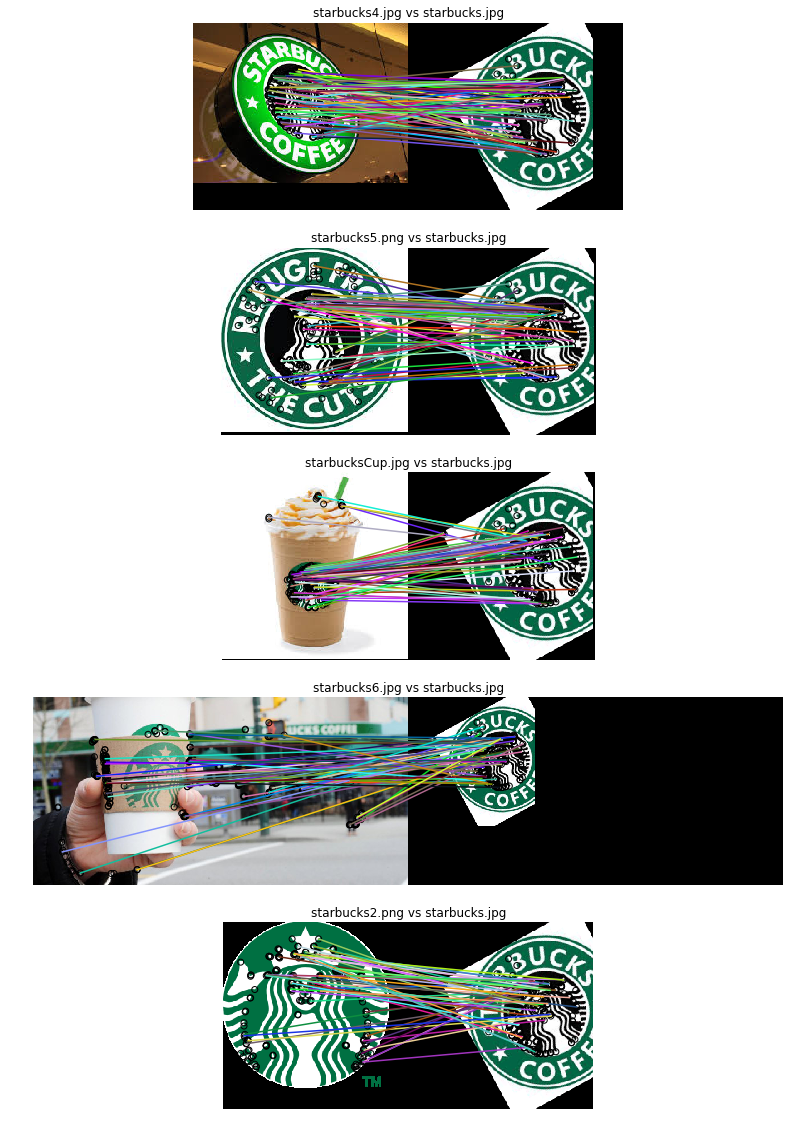

In [46]:
from skimage import transform as tf
from operator import itemgetter

starbucks_logo = io.imread('./images/starbucks.jpg')
tform = tf.AffineTransform(scale=(1.2, 1.2), rotation=0.5, translation=(0, -100))
starbucks_logo = tf.warp(starbucks_logo, tform)

starbucks2 =  io.imread('./images/starbucks2.png')
starbucks2 = starbucks2[:,:,:3]
starbucks4 =  io.imread('./images/starbucks4.jpg')
starbucks5 =  io.imread('./images/starbucks5.png')
starbucks6 =  io.imread('./images/starbucks6.jpg')
starbucksCup =  io.imread('./images/starbucksCup.jpg')

images = []

matches12, keypoints1, keypoints2 = matchsORB(starbucks2, starbucks_logo)
images.append((starbucks2,starbucks_logo,keypoints1,keypoints2,matches12,len(matches12), 'starbucks2.png', 'starbucks.jpg'))

matches13, keypoints1, keypoints3 = matchsORB(starbucks4, starbucks_logo)
images.append((starbucks4,starbucks_logo,keypoints1,keypoints3,matches13,len(matches13), 'starbucks4.jpg', 'starbucks.jpg'))

matches14, keypoints1, keypoints4 = matchsORB(starbucks5, starbucks_logo)
images.append((starbucks5,starbucks_logo,keypoints1,keypoints4,matches14,len(matches14), 'starbucks5.png', 'starbucks.jpg'))

matches15, keypoints1, keypoints5 = matchsORB(starbucks6, starbucks_logo)
images.append((starbucks6,starbucks_logo,keypoints1,keypoints5,matches15,len(matches15), 'starbucks6.jpg', 'starbucks.jpg'))

matches16, keypoints1, keypoints6 = matchsORB(starbucksCup, starbucks_logo)
images.append((starbucksCup,starbucks_logo,keypoints1,keypoints6,matches16,len(matches16), 'starbucksCup.jpg', 'starbucks.jpg'))

sortedimages = list(reversed(sorted(images,key=itemgetter(5))))
showcaseORB(sortedimages)

**Optional:** Repeate the experiment with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.



### Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

* ORB Object detection fins out similar points between two images. Those similar points are "choosed" measuring his intensity between center pixel and those in circular ring around center. Around those points is able to find similarity patterns between both images. Template-based methods only use pixel info, and HOG-based methods (in my opinion, the best method) uses the info of the gradient information.

- What would happen if you analyse an image that does not contain the Starbucks logo? 

* We will find no-keypoints or keypoints that have a low similarity (fake detections). 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

* Its a bad method, but maybe we can find patterns on an image using the color information, only on some cases and with a normal contrast

## Delivery

All code sould be commented in English. Answers of the questions should be given in English too.

Compressed file **P4_Student1_Student2.zip** that includes:
- The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
- The images used that are not provided in P1.zip.

**Deadline (Campus Virtual): November 21st, 11:00 p.m.** 

In [41]:
#Appendix: In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)